# run-elmer

- Run Elmer FEM (inside a container) from Python
- Requires a working Docker and docker-py installations
- In future: support using noncontainerized Elmer FEM binary

## Installation

```
pip install run-elmer
```

## Usage

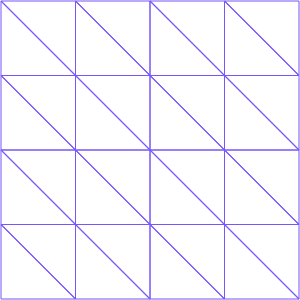

In [17]:
import run_elmer as elmer

m = elmer.mesh(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]],
    [[0, 1, 2],
     [1, 2, 3]]
).refined(2).with_boundaries({
    'left': lambda x: x[0] == 0,
    'right': lambda x: x[0] == 1,
})

m  # use in Elmer?

In [18]:
out = elmer.run(m, """
Header
  Mesh DB "." "."
End

Simulation
  Coordinate System = Cartesian
  Simulation Type = Steady
  Post File = "results.vtu"
End

Body 1
  Equation = 1
  Body Force = 1
End

Body Force 1 :: Source = Real 1.0
Equation 1 :: Active Solvers(1) = 1

Solver 1
  Equation = "Poisson"
  Variable = "Potential"
  Variable DOFs = 1
  Procedure = "Poisson" "PoissonSolver"
  Linear System Solver = "Direct"
  Linear System Direct Method = UMFPack
  Steady State Convergence Tolerance = 1e-09
End

Boundary Condition 1
  {}
  Potential = Real 0
End
""".format(elmer.target_boundaries(m, 'left', 'right')), verbose=False)

In [19]:
out.point_data

{'potential': array([[0.     ],
        [0.     ],
        [0.     ],
        [0.     ],
        [0.     ],
        [0.125  ],
        [0.125  ],
        [0.125  ],
        [0.     ],
        [0.     ],
        [0.09375],
        [0.     ],
        [0.09375],
        [0.09375],
        [0.09375],
        [0.09375],
        [0.     ],
        [0.09375],
        [0.     ],
        [0.09375],
        [0.09375],
        [0.125  ],
        [0.125  ],
        [0.09375],
        [0.09375]])}

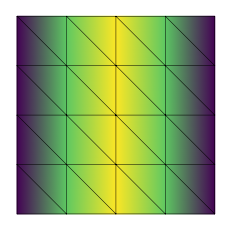

In [20]:
elmer.plot(m, out.point_data['potential'], edges=True)